# Лабораторная работа 1.
## Трудоёмкость алгоритма обработки данных.
## Моделирование функций активации нейрона.

In [138]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.fftpack
import time as pTime

## 3.2. Оценка трудоемкости обработки данных с помощью ДПФ и БПФ

  а) Дискретизацию и визуализацию функций синуса и косинуса с частотой 2 кГц в двух вариантах: для заданного интервала наблюдения и для заданного количества  точек; 
  
  б) Вычислить фурье образы исходных сигналов с помощью прямого вычисления ДПФ и с помощью ДПФ, реализованного в MATLAB (функция fft); 
  
  в) Визуально сравнить реальные и мнимые части фурье образов и квадраты их модулей

In [139]:
def generate_sin_sample(f0, fs, duration, amplitude):
    total_samples = fs * duration
    w = 2.0 * np.pi * f0 / fs
    k = np.arange(0, total_samples)
    return amplitude * np.sin(k * w), np.arange(0, duration, duration / total_samples)

In [140]:
def generate_cos_sample(f0, fs, duration, amplitude):
    total_samples = fs * duration
    w = 2.0 * np.pi * f0 / fs
    k = np.arange(0, total_samples)
    return amplitude * np.cos(k * w), np.arange(0, duration, duration / total_samples)

In [141]:
def get_fft(y, fs): # Дискретное преобразование Фурье
    N = len(y)

    k = np.arange(0, N)
    Ex = np.exp(-1j * 2 * np.pi / N * np.outer(k, k))
    yf = np.dot(y, Ex)

    Y2 = yf * np.conj(yf)  # Квадрат модуля Фурье-образа
    ff = k * fs / N  # Вектор частоты, Гц

    # plt.figure(1)5
    plt.figure(figsize=(15, 10))
    plt.plot(ff, Y2, 'r')
    plt.xlabel('Frequency, Hz')
    plt.ylabel('Fourier-image modulus squared')
    plt.show()

    return yf


In [142]:
def get_python_fft(y, fs):
    N = len(y)
    yf = scipy.fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*1/fs), N//2)

    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.xlabel('Frequency, Hz')
    plt.ylabel('Fourier-image modulus squared')
    plt.show()

    return yf

In [143]:
def get_error(yf_my, yf_python):
    error_real = np.real(yf_my) - np.real(yf_python)
    error_imag = np.imag(yf_my) - np.imag(yf_python)

    xe = np.arange(0, len(error_real))

    figure, axis = plt.subplots(1, 2) 

    axis[0].plot(xe, error_real)
    axis[0].set_xlabel('Frequency, Hz')
    axis[0].set_ylabel('Error')
    axis[0].set_title("error_real") 
    
    axis[1].plot(xe, error_imag)
    axis[1].set_xlabel('Frequency, Hz')
    axis[1].set_ylabel('Error')
    axis[1].set_title("error_imag") 
    
    plt.show()

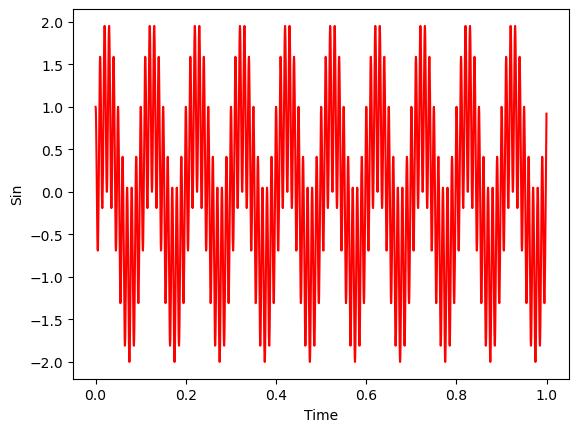

C:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


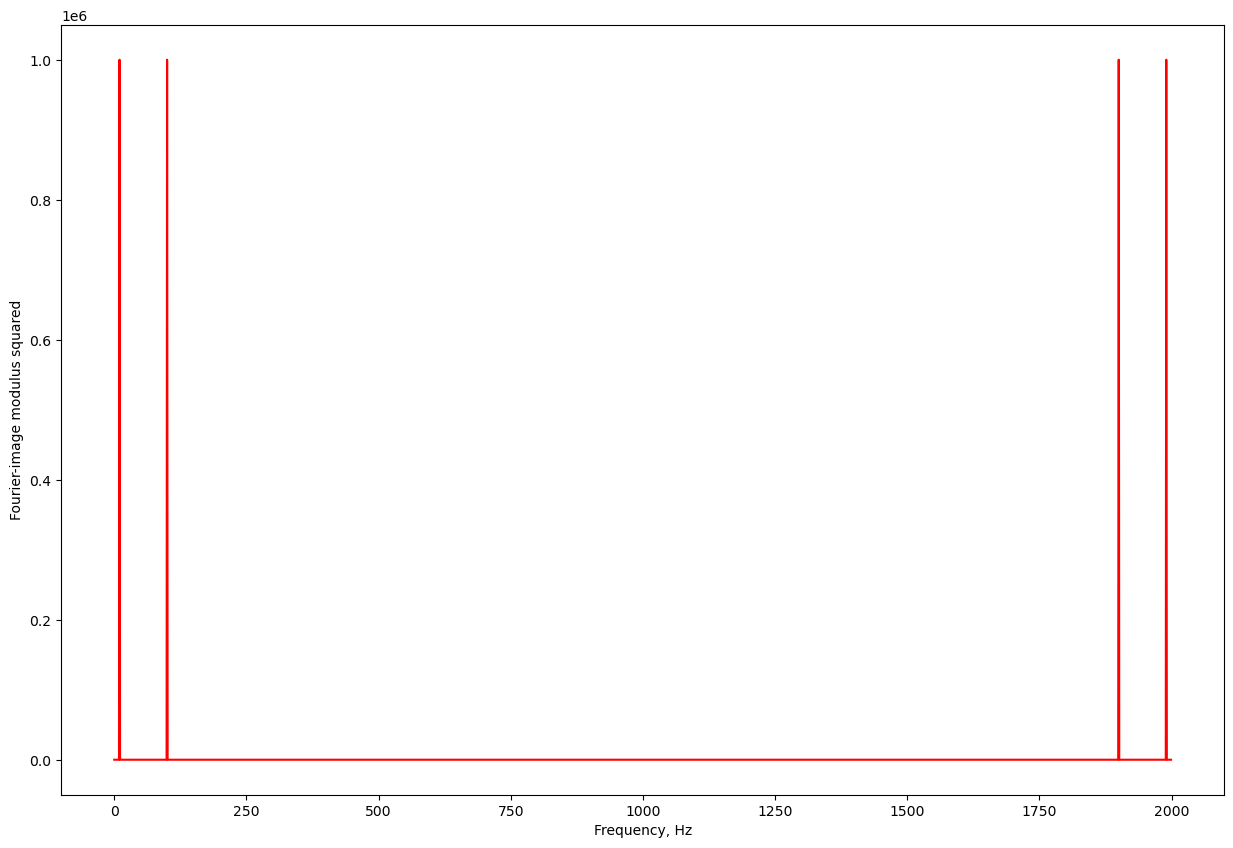

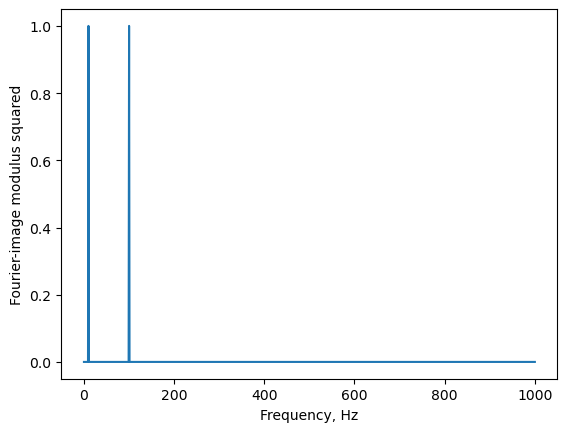

2000 2000


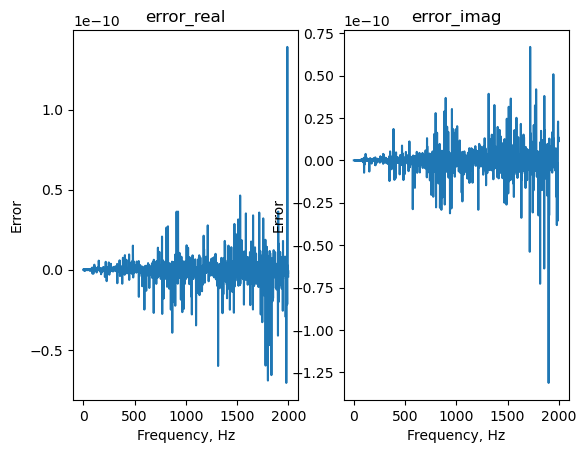

In [144]:
duration = 1
amplitude = 1
fs = 2000

ys10, time = generate_sin_sample(10, fs, duration, amplitude)
yc100, time =  generate_cos_sample(100, fs, duration, amplitude)

y = ys10 + yc100

plt.plot(time, y, 'r')
plt.xlabel('Time')
plt.ylabel('Sin')
plt.show()

yf_my = get_fft(y, fs)
yf_python = get_python_fft(y, fs)

print(len(yf_my), len(yf_python))

get_error(yf_my, yf_python)


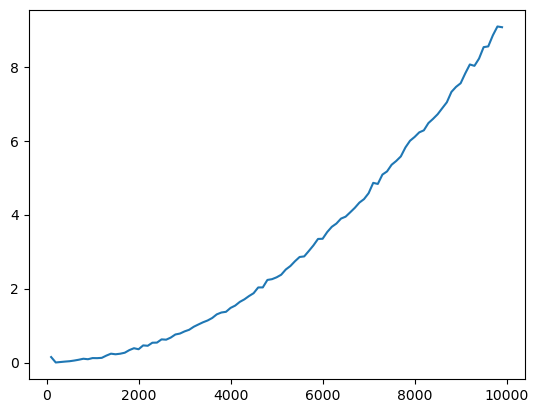

In [145]:
duration = 1
amplitude = 1

x = np.array(range(100 , 10000, 100))
yTime = np.zeros(len(x))

i = 0
for fs in x:
    y, time = generate_sin_sample(10, fs, duration, amplitude)
    start_time = pTime.time()

    N = len(y)
    k = np.arange(0, N)
    Ex = np.exp(-1j * 2 * np.pi / N * np.outer(k, k))
    yf = np.dot(y, Ex)

    yTime[i] = pTime.time() - start_time
    i += 1

plt.plot(x, yTime)
plt.show()
    
    


# 3.3. Программирование функций активации нейрона (перцептрона)
Написать программу-функцию, реализующую вычисление и отображение функций активации, 
представленных в разделе 2. Результат представить в виде m-функции, на вход которой поступает
массив входных данных v, а также, если требуется, параметр а в результате ее выполнения производится
прорисовка требуемой функции активации.


In [146]:
def sigmoid_activation(v, a=1):
    return 1 / (1 + np.exp(-a*v))

def tanh_activation(v, a=1):
    return np.tanh(v / a)

def linear_threshold_activation(v, a=0):
    return np.where(v >= a, 1, 0)

def unit_step_activation(v, a=0):
    return np.where(v >= a, 1, 0)

In [147]:
def plot_sigmoid_activation(v, a=1):
    activation_sigmoid = sigmoid_activation(v, a)
    activation_tanh = tanh_activation(v, a)
    activation_linear = linear_threshold_activation(v, a)
    activation_unit = unit_step_activation(v, a)

    figure, axis = plt.subplots(2, 2) 

    axis[0,0].plot(v, activation_unit, label='Unit Step Activation Function')
    axis[0,0].set_xlabel('Input')
    axis[0,0].set_ylabel('Output')
    axis[0,0].set_title("Unit Step Activation Function") 
    axis[0,0].grid(True)

    axis[0,1].plot(v, activation_sigmoid, label='Sigmoid Activation Function')
    axis[0,1].set_xlabel('Input')
    axis[0,1].set_ylabel('Output')
    axis[0,1].set_title("Sigmoid Activation Function") 
    axis[0,1].grid(True)

    axis[1, 0].plot(v, activation_tanh, label='Tanh Activation Function')
    axis[1, 0].set_xlabel('Frequency, Hz')
    axis[1, 0].set_ylabel('Error')
    axis[1, 0].set_title("Tanh Activation Function")
    axis[1, 0].grid(True)

    axis[1,1].plot(v, activation_linear, label='Linear Threshold Activation Function')
    axis[1,1].set_xlabel('Input')
    axis[1,1].set_ylabel('Output')
    axis[1,1].set_title("Linear Threshold Activation Function") 
    axis[1,1].grid(True)
    
    plt.show()

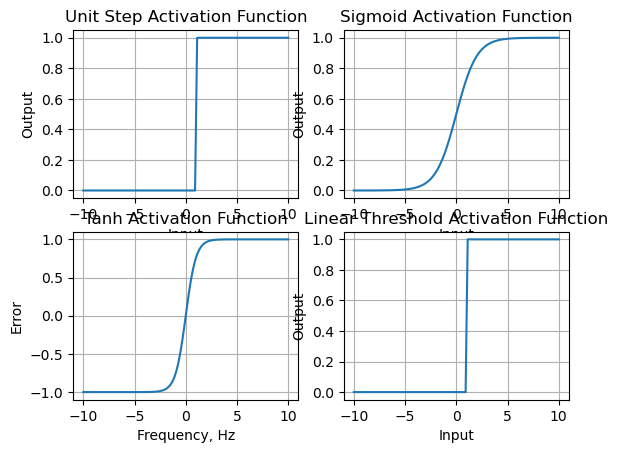

In [148]:
v = np.linspace(-10, 10, 100)  # Генерация массива входных данных от -10 до 10
plot_sigmoid_activation(v)

# 3.4. Представление данных
Представьте результаты пп. 2.1-2.3 в виде матриц размерности обучающего набора 


In [149]:
tn = np.linspace(0, 10, 100)  

a = 5
activation_sigmoid = sigmoid_activation(tn, a)
activation_tanh = tanh_activation(tn, a)
activation_linear = linear_threshold_activation(tn, a)
activation_unit = unit_step_activation(tn, a)

matrix_sigmoid = np.column_stack((tn, activation_sigmoid))
print("matrix_sigmoid\n", matrix_sigmoid)

matrix_tanh = np.column_stack((tn, activation_tanh))
print("matrix_sigmoid\n", matrix_sigmoid)

matrix_linear = np.column_stack((tn, activation_linear))
print("matrix_sigmoid\n", matrix_sigmoid)

matrix_unit = np.column_stack((tn, activation_unit))
print("matrix_sigmoid\n", matrix_sigmoid)

matrix_sigmoid
 [[ 0.          0.5       ]
 [ 0.1010101   0.62364548]
 [ 0.2020202   0.73303992]
 [ 0.3030303   0.81982341]
 [ 0.4040404   0.8829019 ]
 [ 0.50505051  0.92589326]
 [ 0.60606061  0.95392449]
 [ 0.70707071  0.97167712]
 [ 0.80808081  0.98271371]
 [ 0.90909091  0.98949616]
 [ 1.01010101  0.99363468]
 [ 1.11111111  0.99614897]
 [ 1.21212121  0.99767244]
 [ 1.31313131  0.99859408]
 [ 1.41414141  0.99915109]
 [ 1.51515152  0.99948753]
 [ 1.61616162  0.99969067]
 [ 1.71717172  0.99981331]
 [ 1.81818182  0.99988733]
 [ 1.91919192  0.999932  ]
 [ 2.02020202  0.99995896]
 [ 2.12121212  0.99997524]
 [ 2.22222222  0.99998505]
 [ 2.32323232  0.99999098]
 [ 2.42424242  0.99999456]
 [ 2.52525253  0.99999672]
 [ 2.62626263  0.99999802]
 [ 2.72727273  0.9999988 ]
 [ 2.82828283  0.99999928]
 [ 2.92929293  0.99999956]
 [ 3.03030303  0.99999974]
 [ 3.13131313  0.99999984]
 [ 3.23232323  0.9999999 ]
 [ 3.33333333  0.99999994]
 [ 3.43434343  0.99999997]
 [ 3.53535354  0.99999998]
 [ 3.6363636

# 3.5. Производная сигмоидной функции
Вычислите (теоретически и численно) производную сигмоидной функции (п. 2.3) и представьте на 
графике

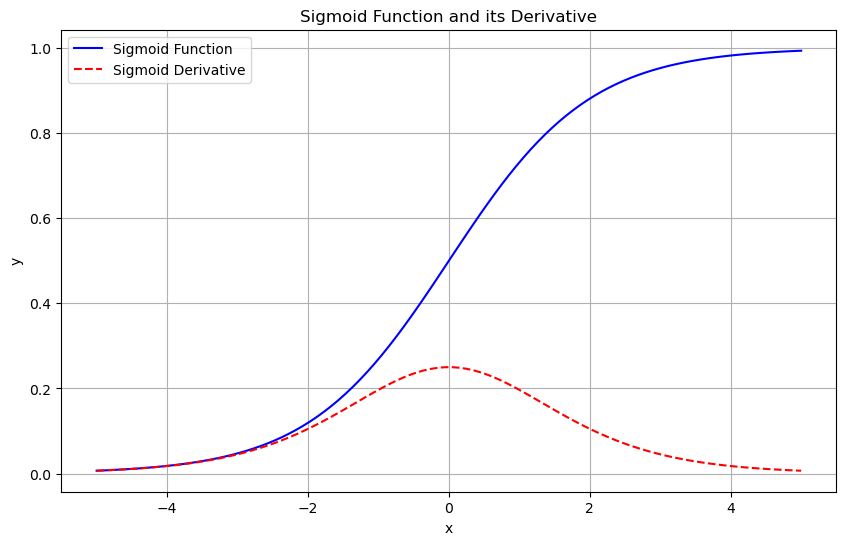

In [150]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Генерация значений x
x = np.linspace(-5, 5, 100)

# Вычисление производной сигмоидной функции
sigmoid_derivative_values = sigmoid_derivative(x)

# Построение графика сигмоидной функции и ее производной
plt.figure(figsize=(10, 6))
plt.plot(x, sigmoid(x), label='Sigmoid Function', color='blue')
plt.plot(x, sigmoid_derivative_values, label='Sigmoid Derivative', linestyle='--', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Function and its Derivative')
plt.legend()
plt.grid(True)
plt.show()